#### Health care🧑‍⚕️, or healthcare, is the improvement of health via the prevention, diagnosis, treatment, amelioration or cure of disease, illness, injury, and other physical and mental impairments in people. Health care is delivered by health professionals and allied health fields. Medicine, dentistry, pharmacy,midwifery, nursing, optometry, audiology, psychology, occupational therapy, physical therapy, athletic training, and other health professions all constitute health care. The term includes work done in providing primary care, secondary care, and tertiary care, as well as in public health.

## Importing the necessary libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Let's First Import Our Health care Report Datset

In [3]:
healthcare_dataset=pd.read_csv("healthcare_dataset.csv")

In [4]:
#Size of The Dataset
healthcare_dataset.shape

(10000, 15)

#### It has 10000 Rows and 15 columns

In [5]:
#Displaying The Columns Names
healthcare_dataset.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
#Checking The DataTypes
healthcare_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

#### We can See in the Output Above That All Columns Data Types are Correct Except Date of Admission and Date of Discharge,They Are Object type but should be Date Type So let's Change It.


In [7]:
#Using Date_Time Function Of Pandas Library
healthcare_dataset['Date of Admission'] = pd.to_datetime(healthcare_dataset['Date of Admission'])
healthcare_dataset['Discharge Date'] = pd.to_datetime(healthcare_dataset['Discharge Date'])
healthcare_dataset.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

In [8]:
#Checking The Null_Values
healthcare_dataset.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
#Checking Duplicate_Values
healthcare_dataset.duplicated().sum()

0

##### The Dataset has no Null Values and Duplicates Either Good✌️. 

In [10]:
#Checking outliers in Age Columns;
healthcare_dataset.Age.unique()

array([81, 35, 61, 49, 51, 41, 82, 55, 33, 39, 45, 23, 85, 72, 65, 32, 64,
       66, 80, 79, 54, 26, 70, 74, 56, 37, 78, 83, 30, 19, 46, 48, 34, 84,
       47, 60, 57, 21, 27, 68, 31, 42, 71, 38, 28, 43, 69, 73, 67, 44, 20,
       59, 76, 40, 36, 29, 53, 77, 24, 75, 25, 62, 52, 50, 22, 63, 58, 18],
      dtype=int64)

<Axes: ylabel='Age'>

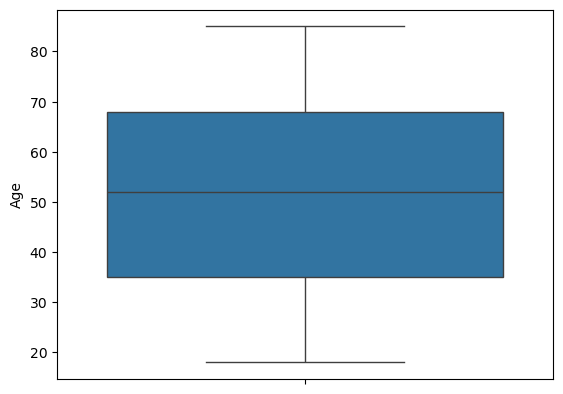

In [11]:
#Plotting Box_Plot for Age
sns.boxplot(healthcare_dataset.Age)

##### Even after Plotting Box_Plot no Outliers can be seen in the Age Column of The Dataset.

In [12]:
#Checking The Different Blood_Types
healthcare_dataset['Blood Type'].unique()

array(['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+'], dtype=object)

##### Seven Different Blood Types are Present in The Dataset

##### We Can See Room_Number Column in a Dataset is a Numerical-value But Despite it Being Numerical it does not provide anything of use after calculating its statistical Values.So we can Change it to categorical value to avoid it being calcuated for statistical_approach.Eg; we Can't Find any Useful_information after Calculating Average_Room_Number or Max or Min Room Number.We can Also Drop Room value but For Now Let's Change it to Categorical


In [13]:
healthcare_dataset['Room Number']=healthcare_dataset['Room Number'].astype(str)

In [14]:
#Let's Find Some Statistical_Summery of the Datset
healthcare_dataset.describe()

,Age,Date of Admission,Billing Amount,Discharge Date
count,10000.000000,10000,10000.000000,10000
mean,51.452200,2021-05-01 21:53:25.439999744,25516.806778,2021-05-17 11:22:24.960000
min,18.000000,2018-10-30 00:00:00,1000.180837,2018-11-01 00:00:00
25%,35.000000,2020-02-10 00:00:00,13506.523967,2020-02-23 18:00:00
50%,52.000000,2021-05-02 00:00:00,25258.112566,2021-05-18 00:00:00
75%,68.000000,2022-07-23 06:00:00,37733.913727,2022-08-07 00:00:00
max,85.000000,2023-10-30 00:00:00,49995.902283,2023-11-27 00:00:00
std,19.588974,NaN,14067.292709,NaN


#### We Can See The Billing Amount is Very Noisy Due to The Many Numers after Decimal Lets Fix It

In [15]:
healthcare_dataset['Billing Amount']=round(healthcare_dataset['Billing Amount'],2)
healthcare_dataset.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1254,Kathleen Reyes,77,Male,A+,Diabetes,2019-07-14,Justin Powell,Smith-Rhodes,UnitedHealthcare,39452.71,208,Urgent,2019-07-21,Aspirin,Normal
7859,Samantha Costa,35,Female,A-,Obesity,2018-11-24,Charles Fisher DDS,Wyatt-Chase,Cigna,15407.96,122,Urgent,2018-12-16,Lipitor,Inconclusive
1458,Tiffany Harper,77,Female,A-,Hypertension,2021-08-11,Terry Williams,Harris-Lynn,Blue Cross,14390.02,494,Urgent,2021-09-06,Paracetamol,Inconclusive
1039,Elizabeth Fernandez,70,Male,A-,Arthritis,2019-04-07,Nicole Lewis,"Mitchell, Khan and Moore",Medicare,9804.14,157,Elective,2019-05-05,Ibuprofen,Normal
6717,Kristin Bishop,51,Male,O-,Obesity,2022-09-04,Anthony Reed,"Reid, Wells and Dixon",Medicare,5530.72,461,Emergency,2022-09-10,Aspirin,Normal


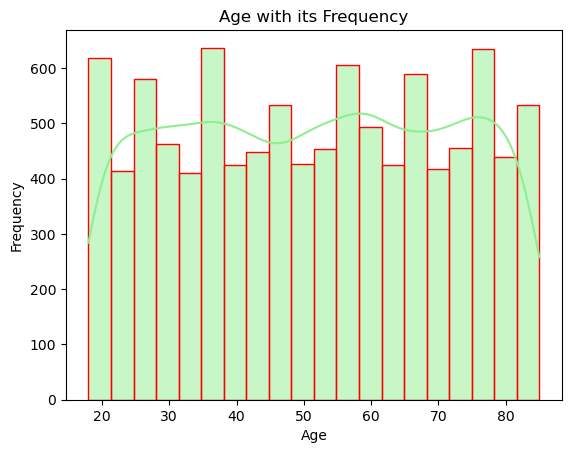

In [16]:
sns.histplot(healthcare_dataset['Age'], bins=20, kde=True, color='lightgreen', edgecolor='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age with its Frequency')
plt.show()

#### The Above Histogram Shows there is no Paticular range with the most Frequecy all ranges have almost equal frequency.

In [17]:
#Counting Age Values
healthcare_dataset.Age.value_counts()

Age
59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: count, Length: 68, dtype: int64

##### Above value Shows That Most patients are of 59 and 78 Ages Respectively.

In [18]:
#Counting Gender Values
healthcare_dataset.Gender.value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64

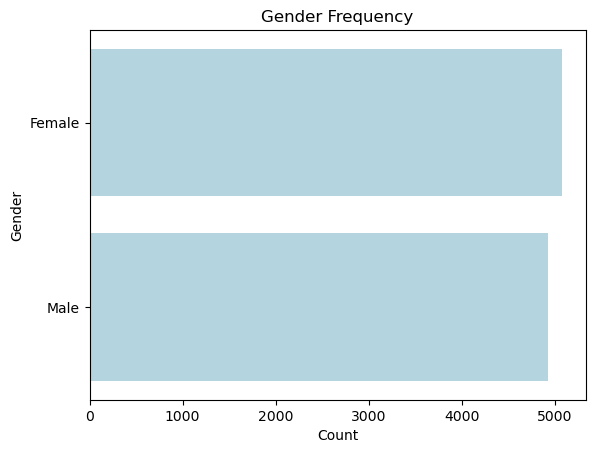

In [19]:
#Lets make a count plot for that
sns.countplot(healthcare_dataset['Gender'],color='lightblue')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Frequency')
plt.show()

##### Above Value and Graph Shows That Both Males and Females Have almost Same Number of patients With Females having a slight edge

In [20]:
#Counting Blood Group Values
healthcare_dataset['Blood Type'].value_counts()

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

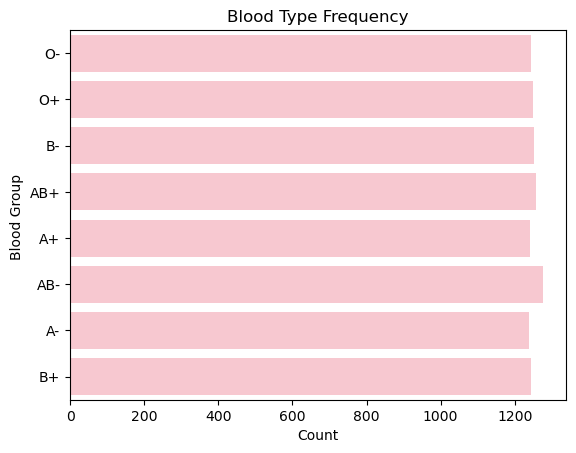

In [21]:
sns.countplot(healthcare_dataset['Blood Type'],color='pink')
plt.xlabel('Count')
plt.ylabel("Blood Group ")
plt.title("Blood Type Frequency")
plt.show()

##### Above Value Shows That All Blood groups Are Equally Common with AB joint type Having The most Patients:

In [22]:
#Checking Which Medical Condition is the most common
healthcare_dataset['Medical Condition'].value_counts()

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

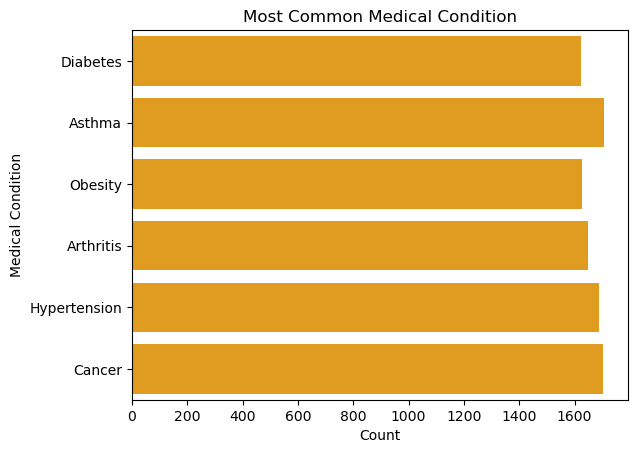

In [23]:
sns.countplot(healthcare_dataset['Medical Condition'],color='orange')
plt.xlabel('Count')
plt.ylabel("Medical Condition")
plt.title("Most Common Medical Condition")
plt.show()

##### The Above graph shows us that Asthma and cancer are the Most Common Medical Conditions:

In [24]:
#Most Famous Hospitals
Most_Famous_hospitals=healthcare_dataset.Hospital.value_counts()
Most_Famous_hospitals

Hospital
Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: count, Length: 8639, dtype: int64

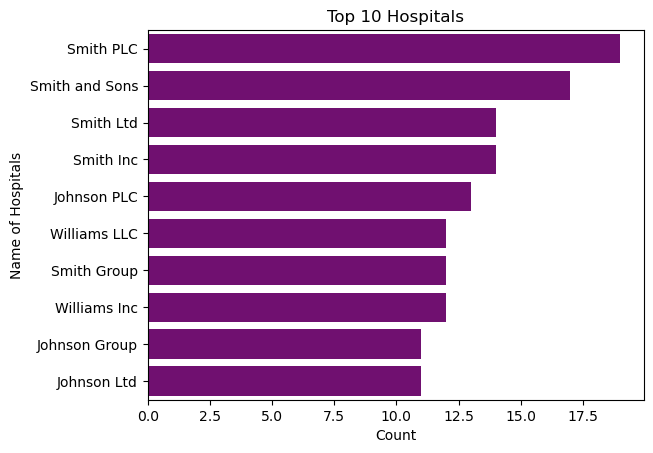

In [25]:
top_10_hospitals = healthcare_dataset['Hospital'].value_counts().nlargest(10).index
sns.countplot(healthcare_dataset.Hospital, order=top_10_hospitals, color="purple")
plt.xlabel('Count')
plt.ylabel('Name of Hospitals')
plt.title('Top 10 Hospitals')
plt.show()

#### This Shows that 'Smith PLC' is the most Famous Hospital Followed By 'Smith and Sons'

In [26]:
#Counting Insurence Policies Providers
healthcare_dataset['Insurance Provider'].value_counts()

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

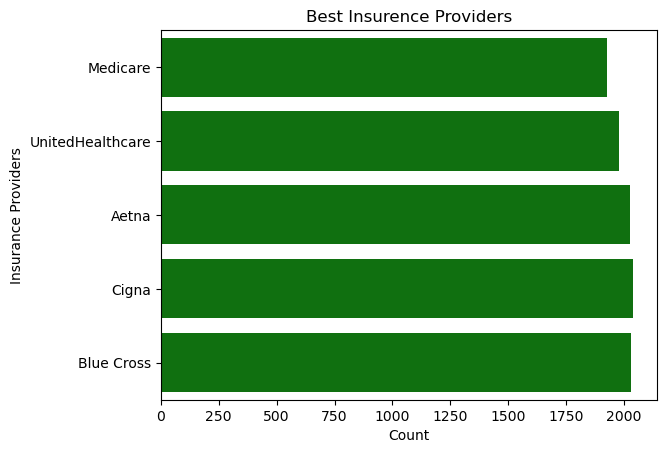

In [27]:
sns.countplot(healthcare_dataset['Insurance Provider'],color='green')
plt.xlabel('Count')
plt.ylabel("Insurance Providers")
plt.title("Best Insurence Providers")
plt.show()

#### Cigna and Blue cross are the best Selling Insurence Companies

In [28]:
#Counting Age Values
healthcare_dataset.Medication.value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

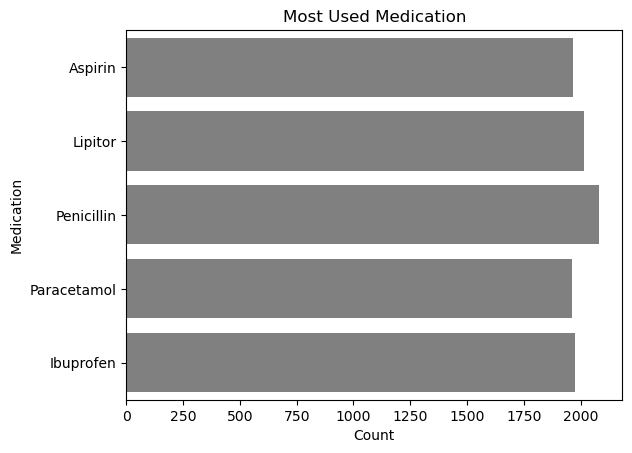

In [29]:
sns.countplot(healthcare_dataset['Medication'],color='grey')
plt.xlabel('Count')
plt.ylabel("Medication")
plt.title("Most Used Medication")
plt.show()

#### The above graph Shows That Penicillin followed by lipitor are the most common Medication given.


In [30]:
#let's Find The Average Age by Gender of Patients
average_age_by_gender = healthcare_dataset.groupby('Gender')['Age'].mean()
average_age_by_gender

Gender
Female    51.608473
Male      51.291168
Name: Age, dtype: float64

In [31]:
#Finding The Most Common Blood Type By Gender
BloodType_by_gender = healthcare_dataset.groupby('Gender')['Blood Type'].agg(lambda x: x.mode())
BloodType_by_gender

Gender
Female    AB-
Male       O-
Name: Blood Type, dtype: object

#### We find Most common Blood Type Among Females is AB- and Males is O-

In [32]:
#Finding The Most Common Disease Type By Gender
Medical_Condition_by_gender = healthcare_dataset.groupby('Gender')['Medical Condition'].agg(lambda x: x.mode())
Medical_Condition_by_gender

Gender
Female          Cancer
Male      Hypertension
Name: Medical Condition, dtype: object

#### We find Most common Medical Condition Among Females is Cancer and Males is Hypertension

In [33]:
#Finding The Most Common Admisssion Type By Gender
Medical_Condition_by_admission_type = healthcare_dataset.groupby('Gender')['Admission Type'].agg(lambda x: x.mode())
Medical_Condition_by_admission_type

Gender
Female       Urgent
Male      Emergency
Name: Admission Type, dtype: object

#### We find Most common Admission Type Among Females is Urgent and Males is Emergency

In [34]:
 healthcare_dataset.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
7219,Mark Edwards,20,Female,O+,Cancer,2019-09-15,Joel Johnson,"Smith, Walker and Johnson",Blue Cross,20614.66,449,Emergency,2019-09-19,Paracetamol,Abnormal
9930,Earl Christensen,71,Female,A+,Obesity,2022-11-25,Corey Williams,Ray-Kane,UnitedHealthcare,24646.93,386,Emergency,2022-12-21,Aspirin,Inconclusive
6859,Kimberly Stephens,35,Female,A+,Hypertension,2022-05-10,Alexandra Miller,Richards-Thompson,Aetna,8473.01,179,Urgent,2022-05-27,Paracetamol,Normal
7610,Brittany Haynes,20,Female,B+,Cancer,2023-08-21,David Jackson,"Torres, Schmidt and Ortiz",Aetna,5590.40,181,Elective,2023-09-03,Aspirin,Normal
4576,Briana Miller,36,Male,O+,Hypertension,2022-08-21,Kristina Henry,"Butler, Trujillo and Smith",Blue Cross,6467.66,223,Emergency,2022-09-04,Lipitor,Inconclusive


In [35]:
#Finding specialization of the all Hospitals
Medical_Condition_by_hospital = healthcare_dataset.groupby('Hospital')['Medical Condition'].agg(lambda x: x.mode())
Medical_Condition_by_hospital

Hospital
Abbott Inc                                     Arthritis
Abbott LLC                     [Arthritis, Hypertension]
Abbott PLC                                     Arthritis
Abbott, Curry and Moore                           Asthma
Abbott-Jordan                               Hypertension
                                         ...            
Zimmerman, Salinas and Hill                       Cancer
Zuniga Ltd                                        Asthma
Zuniga, Taylor and Scott                          Asthma
Zuniga-Chandler                             Hypertension
Zuniga-Johnson                                   Obesity
Name: Medical Condition, Length: 8639, dtype: object

In [36]:
healthcare_dataset['Length_of_Stay']=(pd.to_datetime(healthcare_dataset['Discharge Date'])-pd.to_datetime(healthcare_dataset['Date of Admission'])).dt.days
healthcare_dataset.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
9022,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.83,410,Elective,2019-06-09,Penicillin,Abnormal,9
138,Patrick Bates,32,Male,B+,Cancer,2023-07-09,Jillian Marshall,"Lara, Ward and Brown",Blue Cross,44535.25,413,Emergency,2023-07-17,Penicillin,Normal,8
7270,Kathleen Evans,75,Male,B-,Hypertension,2022-02-08,Kathleen Day,Hull and Sons,Cigna,1614.54,387,Elective,2022-02-21,Ibuprofen,Normal,13
1595,Sylvia Oneal,36,Female,A-,Arthritis,2020-01-07,Jay Lawson,Savage-Sanchez,UnitedHealthcare,4661.98,489,Elective,2020-01-14,Paracetamol,Abnormal,7
9240,Marcus Smith,56,Male,AB+,Arthritis,2019-08-29,Danielle King,"Shaffer, White and Finley",Cigna,19038.58,186,Emergency,2019-09-23,Paracetamol,Abnormal,25


In [37]:
#Let's Find The Average Days a patient stays in a Hostpital
healthcare_dataset['Length_of_Stay'].mean()

15.5618

#### An Average Person Stays Almost 15-16 Days After Being Admitted in a Hospital

In [38]:
#Finding Average Stay in Each Hospitals
average_length_of_stay_by_gender = healthcare_dataset.groupby('Gender')['Length_of_Stay'].mean()
average_length_of_stay_by_gender

Gender
Female    15.615764
Male      15.506193
Name: Length_of_Stay, dtype: float64

In [39]:
#Finding Average Stay For Each Medical_Condition
average_length_of_stay_by_medical_condition = healthcare_dataset.groupby('Medical Condition')['Length_of_Stay'].mean()
average_length_of_stay_by_medical_condition

Medical Condition
Arthritis       15.990303
Asthma          15.481265
Cancer          15.479742
Diabetes        15.574245
Hypertension    15.430095
Obesity         15.421990
Name: Length_of_Stay, dtype: float64

In [40]:
#Finding Average Stay For Each Medical_Condition
average_length_of_stay_by_admission_type = healthcare_dataset.groupby('Admission Type')['Length_of_Stay'].mean()
average_length_of_stay_by_admission_type

Admission Type
Elective     15.601172
Emergency    15.609742
Urgent       15.476556
Name: Length_of_Stay, dtype: float64

In [41]:
#Finding Average_Billing of Each Hospitals
Billing_by_hospital = healthcare_dataset.groupby('Hospital')['Billing Amount'].mean()
Billing_by_hospital

Hospital
Abbott Inc                     32114.21
Abbott LLC                     10497.36
Abbott PLC                     31786.83
Abbott, Curry and Moore        11869.28
Abbott-Jordan                  25326.81
                                 ...   
Zimmerman, Salinas and Hill    44147.79
Zuniga Ltd                     25298.40
Zuniga, Taylor and Scott       15868.94
Zuniga-Chandler                34439.14
Zuniga-Johnson                 22624.01
Name: Billing Amount, Length: 8639, dtype: float64

In [42]:
#Hospitals with Most Average Billing
Billing_by_hospital.nlargest(10)

Hospital
Arellano-Mahoney                   49995.90
Ellison-Johnson                    49994.98
Thompson, Carlson and Kim          49985.97
Morales, Ferrell and Clark         49974.81
Smith, Cooper and Chavez           49974.30
Webster, Oconnell and Norton       49974.16
Ford, Gibson and Parker            49958.00
Dunn Ltd                           49954.97
Sanders, Robertson and Williams    49951.26
Harmon-Anderson                    49947.56
Name: Billing Amount, dtype: float64

In [43]:
#Hospitals with Least Average Billing
Billing_by_hospital.nsmallest(10)

Hospital
Nguyen-Allen                   1004.42
Johnston PLC                   1020.34
Pennington-Cook                1032.64
Reeves, Hunt and Cruz          1036.08
Reyes-Mills                    1042.98
Rose, Vargas and Fox           1057.02
Russell, Smith and Saunders    1068.42
Cooper-Garcia                  1070.02
Wolf-Myers                     1071.46
Aguilar, Hubbard and Glenn     1082.44
Name: Billing Amount, dtype: float64

ValueError: could not convert string to float: 'Elective'

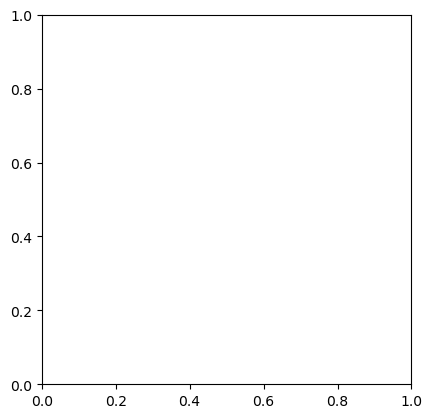

In [44]:
plt.pie(healthcare_dataset['Admission Type'])
plt.show()